### Improving Computer Vision Accuracy using Convolutions

The main concept of convolutions is that they narrow down the content of the image to focus on specific parts.

In [1]:
#importing libraries

import tensorflow as tf
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()
print(f"Shape of the training image is: {train_images[0].shape}")

Shape of the training image is: (28, 28)


In [2]:
#defining the model

model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation="sigmoid")

    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [4]:
print("MODEL TRAINING:\n")
model.fit(train_images, train_labels, epochs=5)

MODEL TRAINING:

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8317 - loss: 0.5354
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8803 - loss: 0.3245
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8921 - loss: 0.2884
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9012 - loss: 0.2611
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9085 - loss: 0.2395


In [5]:
print("MODEL EVALUATION:\n")
test_loss, test_accuracy=model.evaluate(test_images, test_labels)
print(f"Test set accuracy: {test_accuracy}")
print(f"Test set loss: {test_loss}")

MODEL EVALUATION:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8817 - loss: 0.3280
Test set accuracy: 0.8816999793052673
Test set loss: 0.32798731327056885


#### Visualizing the Convolutions and Pooling

In [6]:
print(f"First 100 labels:\n\n{test_labels[:100]}")

print(f"\nShirts indexed at: {[i for i in range(100) if test_labels[:100][i]==9]}")

First 100 labels:

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]

Shirts indexed at: [0, 23, 28, 39, 68, 83]


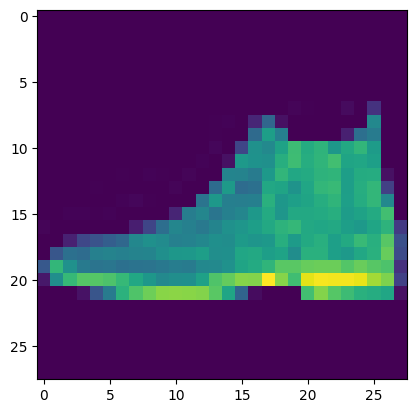

In [7]:
plt.imshow(test_images[0])

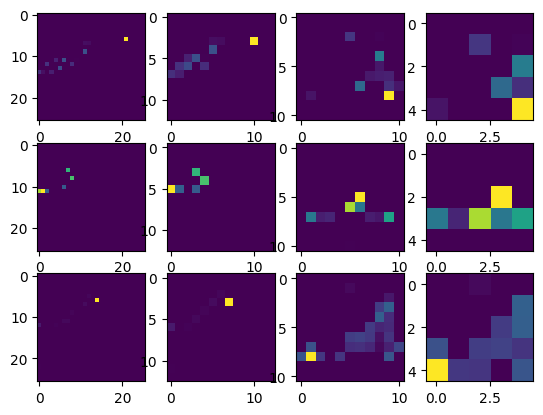

In [8]:
first_image = test_images[0]
second_image = test_images[23]
third_image = test_images[28]

layers_to_visualize = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D]

layer_outputs = [layer.output for layer in model.layers if type(layer) in layers_to_visualize]
activation_models = tf.keras.models.Model(inputs = model.inputs, outputs = layer_outputs)


for x in range(len(layer_outputs)):

    f1 = activation_models.predict(first_image.reshape(1,28,28,1), verbose=False)[x]
    plt.subplot(3,len(layer_outputs), x+1)
    plt.imshow(f1[0, :, :, 1]) 
    
    f2 = activation_models.predict(second_image.reshape(1,28,28,1), verbose=False)[x]
    plt.subplot(3,len(layer_outputs), len(layer_outputs)+x+1)
    plt.imshow(f2[0, :, :, 1])
    
    f3 = activation_models.predict(third_image.reshape(1,28,28,1), verbose=False)[x]
    plt.subplot(3, len(layer_outputs), 2*len(layer_outputs)+x+1)
    plt.imshow(f3[0, :, :, 1])   



#### Exploring Convolutions

Let's explore how convolutions work by creating a bsic convoution on a 2D grayscale image.

In [9]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np

#ascent image to work on
from scipy.datasets import ascent

In [10]:
#loading the ascent image
ascent_image = ascent()

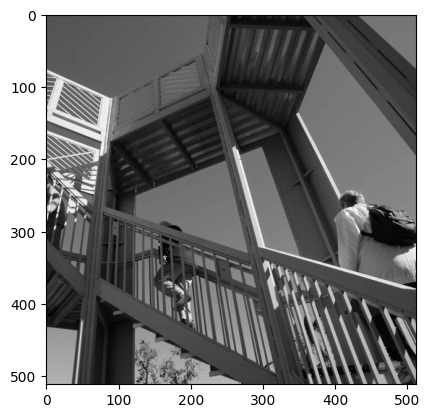

In [12]:
#visualize the ascent image

plt.imshow(ascent_image)
plt.gray()

In [13]:
#copy image to a numpy array
image_transformed = np.copy(ascent_image)

#dimensions of the image

size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

print(f"image_transformed has shape: {size_x, size_y}")

image_transformed has shape: (512, 512)


In [32]:
# some filters to experiment with

filter = [[0,1,0], [1,-4,1], [0,1,0]]

#filter = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

#filter= [[-5, 0, -5], [-5, 0, -5], [-5, 0, -5]]





In [33]:
filter_array= np.array(filter)
from scipy import signal
transformed_image = signal.convolve2d(image_transformed, filter_array, mode="valid")

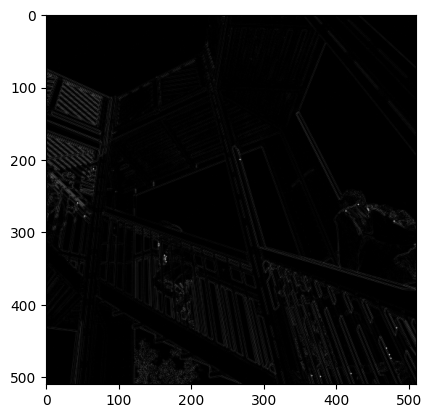

In [34]:
plt.imshow(np.absolute(transformed_image))
